In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split   
import math
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("dataset/3_data.csv", header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
grade1       100 non-null float64
grade2       100 non-null float64
label;;;;    100 non-null object
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


In [4]:
# clean up data
df.columns = ["grade1","grade2","label"]

x = df["label"].map(lambda x: float(x.rstrip(';')))

# formats the input data into two arrays, one of independant variables
# and one of the dependant variable
X = df[["grade1","grade2"]]
X = np.array(X)
X[:10]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331]])

In [5]:
Y = df["label"].map(lambda x: float(x.rstrip(';')))
Y = np.array(Y)
Y[:10]

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1.])

In [6]:
dau = len(np.where(Y == 1)[0])
dau

60

In [7]:
rot = len(np.where(Y == 0)[0])
rot

40

In [8]:
# creating testing and training set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)

In [9]:
clf = LogisticRegression()
clf.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
print('score Scikit learn: ', clf.score(X_test,Y_test))

score Scikit learn:  0.7272727272727273


In [12]:
Y_pred = clf.predict(X_test)
Y_pred

array([0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
from sklearn.metrics import accuracy_score 
print("The prediction accuracy is: ", clf.score(X_test,np.array(Y_pred))*100, "%")

The prediction accuracy is:  100.0 %


In [14]:
print("Accuracy is ", accuracy_score(Y_test,Y_pred)*100,"%") 

Accuracy is  72.72727272727273 %


In [15]:
Y_pred = clf.predict(np.array([[70.0,70.0],[50.0,40.0]]))
Y_pred

array([1., 0.])

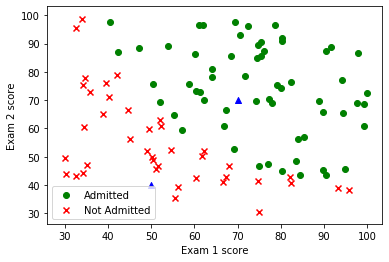

In [16]:
pos = np.where(Y == 1)
neg = np.where(Y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='g') # pass
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r') # fail
plt.scatter([70], [70], marker='^', c='b') 
plt.scatter([50], [40], marker='^', c='b') 
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()